In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Práctica 3

**Esteban Reyes Saldaña**

Procesamiento del Lenguaje Natural


Práctica 3: Bolsa de Términos y esquemas de pesado

In [ ]:
import os
import re
# buscar
from keras.preprocessing.text import Tokenizer

In [ ]:
def get_texts_from_file (path_corpus, path_truth) :
  tr_txt = []
  tr_y   = []

  with open (path_corpus, "r") as f_corpus, open(path_truth, "r") as f_truth:
    for twitt in f_corpus:
      tr_txt += [twitt]
    for label in f_truth:
      tr_y   += [label]
  return tr_txt, tr_y

In [ ]:
# Ruta para leer desde drive
dir = '/content/drive/MyDrive/CIMAT/Segundo Semestre/Lenguaje Natural/Práctica 3'

In [ ]:
tr_txt, tr_y = get_texts_from_file(dir + '/mex_train.txt', dir + '/mex_train_labels.txt')

# Estadísticas Simples

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

Counter({'0\n': 3563, '1\n': 1981})


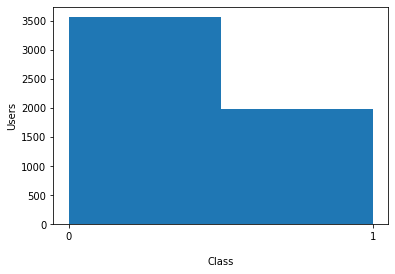

In [ ]:
print(Counter(tr_y))
plt.hist(tr_y, bins = len(set(tr_y)))

plt.ylabel('Users');
plt.xlabel('Class');

## Un ojo a los datos

In [ ]:
tr_txt[:10]

['lo peor de todo es que no me dan por un tiempo y luego vuelven estoy hasta la verga de estl\n',
 'a la vga no seas mamón 45 putos minutos después me dices que apenas sales no me querías avisar en 3 horas? 😑\n',
 'considero que lo más conveniente seria que lo retes a unos vergazos mi jelipe! rómpele la madre a ese pinchi joto!\n',
 'el marica de mi ex me tiene bloqueada de todo así  uno no puede admirar la "belleza" de su garnacha 😂\n',
 'mujer despechadaya pinche amlo hazle esta que se pela la loca #reynosafollow #reynosa\n',
 'putos. no tienen madre. ambriados mantenidos. ojetes. como es posible. mejor matarlos\n',
 'ustedes si puden andar de chanceros pero cuidadito y seamos nosotras porque luego luego empiezan a mamar hijos de la chingada.\n',
 '@usuario jajjaja te digo esa madre si está buena ajjaja\n',
 'odio los putos trámites de titulación 😡😡😡😡😡😡😡😡😡😡😡 pero me urge la precedula.\n',
 '@usuario no te equivocabas mi madre y tu tenían muchísima razón siempre es mejor lo que viene 

## Construcción Simple del Vocabulario

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [ ]:
import nltk
corpus_palabras = []
for doc in tr_txt:
  corpus_palabras += tokenizer.tokenize(doc)

fdist = nltk.FreqDist(corpus_palabras)

In [ ]:
len(fdist)

13523

In [ ]:
def sortfreqDict(freqdict):
  aux = [(freqdict[key], key) for key in freqdict]
  aux.sort()
  aux.reverse()
  return aux

In [ ]:
V = sortfreqDict(fdist)

In [ ]:
V = V[:5000]

In [ ]:
V

[(3383, 'que'),
 (3357, 'de'),
 (2774, '.'),
 (2630, 'a'),
 (2433, 'la'),
 (2266, 'y'),
 (1824, 'no'),
 (1613, 'me'),
 (1505, '!'),
 (1303, 'el'),
 (1263, '@usuario'),
 (1191, 'en'),
 (1148, 'verga'),
 (1079, 'madre'),
 (969, 'se'),
 (895, 'putas'),
 (888, 'los'),
 (867, 'es'),
 (831, 'putos'),
 (786, '?'),
 (770, 'con'),
 (763, 'por'),
 (718, 'mi'),
 (697, 'un'),
 (693, 'te'),
 (683, 'ya'),
 (663, 'si'),
 (652, '"'),
 (644, 'lo'),
 (628, 'las'),
 (566, 'como'),
 (565, 'para'),
 (556, 'loca'),
 (549, 'su'),
 (525, 'tu'),
 (502, 'una'),
 (472, '...'),
 (439, 'pero'),
 (409, 'le'),
 (377, '😂'),
 (359, 'al'),
 (329, 'del'),
 (314, 'más'),
 (303, 'yo'),
 (296, 'pinche'),
 (281, 'cuando'),
 (277, 'puta'),
 (273, 'qué'),
 (263, 'todos'),
 (260, 'o'),
 (259, ':'),
 (250, 'bien'),
 (244, 'son'),
 (241, 'estoy'),
 (240, '¿'),
 (238, 'les'),
 (233, 'hdp'),
 (230, 'porque'),
 (229, 'sus'),
 (218, 'todo'),
 (209, 'joto'),
 (208, 'ni'),
 (199, 'hasta'),
 (198, 'esta'),
 (189, 'está'),
 (183, '…'),


In [ ]:
dict_indices = dict()
count = 0

for wigth, word in V:
  dict_indices[word] = count
  count += 1

## Bolsa de Términos

In [ ]:
import numpy as np

def build_bow_tr(tr_txt, V, dict_indices):
  BOW = np.zeros((len(tr_txt), len(V)), dtype = int)

  cont_doc = 0
  for tr in tr_txt:
    fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))

    for word in fdist_doc:
      if word in dict_indices:
        BOW[cont_doc, dict_indices[word]] = 1
    
    cont_doc += 1
  return BOW

In [ ]:
BOW_tr = build_bow_tr(tr_txt, V, dict_indices)

In [ ]:
BOW_tr.shape

(5544, 5000)

# Bolsa de Términos en Validación

Counter({0: 397, 1: 219})


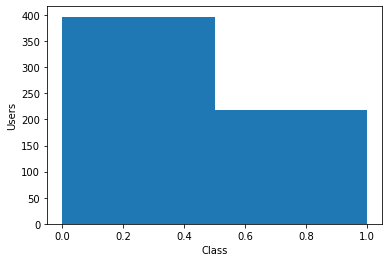

In [ ]:
val_txt, val_y = get_texts_from_file(dir + '/mex_val.txt', dir + '/mex_val_labels.txt')

val_y = list(map(int, val_y))

print(Counter(val_y))
plt.hist(val_y, bins = len(set(val_y)))

plt.ylabel('Users');
plt.xlabel('Class');

In [ ]:
BOW_val = build_bow_tr(val_txt, V, dict_indices)

# Clasificación

In [ ]:
tr_y = list(map(int, tr_y))

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score 

In [ ]:
parameters = {'C':[.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight = 'balanced')
grid = GridSearchCV(estimator = svr, param_grid = parameters, n_jobs = 8, scoring= "f1_macro", cv = 5)

grid.fit(BOW_tr, tr_y)

y_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(val_y, y_pred, average = 'macro', pos_label = 1) 

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))


[[332  65]
 [ 49 170]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       397
           1       0.72      0.78      0.75       219

    accuracy                           0.81       616
   macro avg       0.80      0.81      0.80       616
weighted avg       0.82      0.81      0.82       616



In [ ]:
incorrect = []
for e in zip(val_y, y_pred, range(len(val_y))):
  #print(e[0])
  #print(e[1])
  if e[0] != e[1]:
    incorrect += [e[2]]

In [ ]:
for e in incorrect:
  case = e
  if "madre" in val_txt[case].strip():
    print("Texto: ", val_txt[case].strip())
    print("Truth: ", val_y[case])
    print("Pred: ", y_pred[case])
    #print("PredProba: ", y_pred_proba[case])

Texto:  cada día me siento como un perro ovejero tratando de cuidar sus ovejas vale madre pinches rateros póngase a trabajar.😤
Truth:  1
Pred:  0
Texto:  🤗es mejor así 🤗👌🏻 a chingar a su madre toda persona que solo de migajas 🤗
Truth:  1
Pred:  0
Texto:  ya a cualquier prieto le dicen licenciado peludito tengan madre
Truth:  1
Pred:  0
Texto:  ahora si a chingar a su madre la fecha fifa y ahora si a disfrutar de nuestra gloriosa liga mx.
Truth:  0
Pred:  1
Texto:  la neta... si yo fuera messi les dijera "chinguen a su madre putos yo hice todo".
Truth:  0
Pred:  1
Texto:  no quería mentarte la madre tan temprano pinche maricón il "buasap" pinche millenial cacha moscas
Truth:  1
Pred:  0
Texto:  los putos a chin.... a su madre! ya me harté de seguir todo el mundo seguiré lo que yo quiera.
Truth:  1
Pred:  0
Texto:  @usuario no tienen abuela madre vergüenza....
Truth:  1
Pred:  0
Texto:  chingas a tu madre sí no cumples la promesa que me hiciste hace tiempo.
Truth:  1
Pred:  0
Texto:  dic